In [188]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import random
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
## Where are we working
proj_dir = '/Users/zstanley/Documents/git_repos/obs_loc_for_scda'
plot_dir = proj_dir + '/plots'
my_data_dir = proj_dir + '/my_data'
nb_dir = proj_dir + '/notebooks'

In [3]:
cd /Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts

/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts


In [4]:
from letkf import *

In [5]:
random.seed(362322)

In [6]:
## Which vertical columns are we considering here?
which_columns = {
  'lons' : [-174.5, 45.5, 75.5, -129.5, 160.5],
  'lats' : [-29.5, -59.5, -24.5, 0.5, 40.5],
  'name' : ['South Pacific', 'Southern Ocean', 'Indian Ocean', 'Tropical Pacific', 'North Pacific'],
  'save_name' : ['south_pacific', 'southern_ocean', 'indian_ocean', 'tropical_pacific', 'north_pacific']
}

In [7]:
# Load indian ocean covariance matrix
io_cov = np.load(my_data_dir +'/indian_ocean_cov.npy')
io_cov = io_cov[:64, :64]
io_cov_sqrt = np.linalg.cholesky(io_cov)

In [8]:
# Get covariance matrix
this_cov = io_cov
this_cov_sqrt = io_cov_sqrt
num_levs = this_cov.shape[0]

In [9]:
# Get correlation matrix
io_cor = np.load(my_data_dir +'/indian_ocean_cor.npy')
io_cor = io_cor[:64, :64]
this_cor = io_cor

In [11]:
indian_ocean = xr.open_dataset(my_data_dir+'/five_columns_indian_ocean.nc')

In [10]:
## Set observation operator
HofX = np.zeros((1, num_levs))
HofX[0, -1] = 1

In [18]:
atm_temp = indian_ocean['atm_T'].mean(['ens_mem', 'lat', 'lon'])
atm_p = indian_ocean['atm_delp'].mean(['ens_mem','lat','lon']).cumsum(dim='atm_lev') / 1e2

In [35]:
innovation = 2
kf_increment = (this_cov[-1,:]/(2*this_cov[-1,-1])) * innovation # Note this is not a general formula!

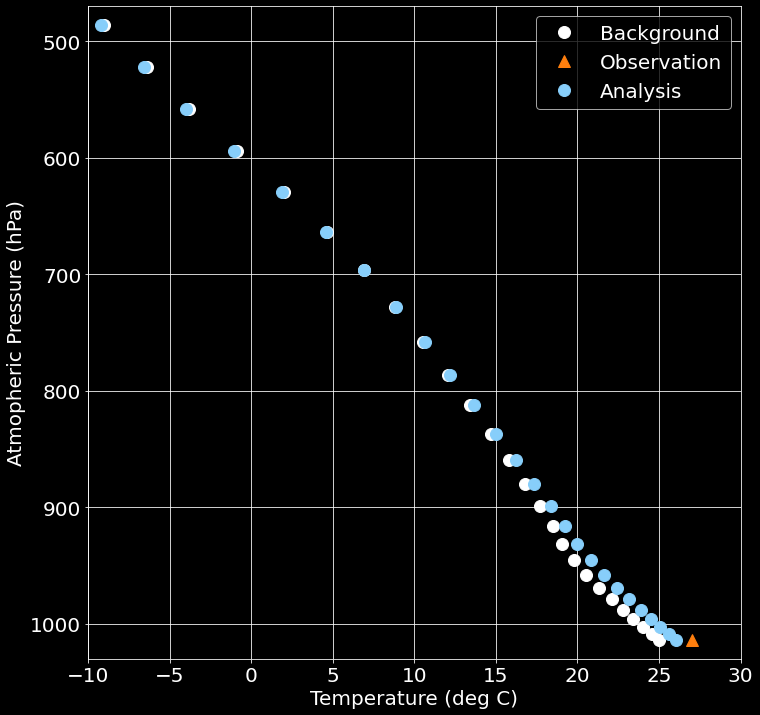

In [81]:
# Style
ax = plt.axes()
plt.style.use('dark_background')

# Data
ax.plot(atm_temp[38:]-273.15, atm_p[38:], 'wo', markersize=12, label='Background')
ax.plot(atm_temp[-1]-273.15+2, atm_p[-1], '^', color='tab:orange', markersize=12, label='Observation')
#ax.plot(atm_temp[-1]-273.15+kf_increment[-1], atm_p[-1], 'o', color='lightskyblue', markersize=12, label='Analysis')
ax.plot(atm_temp[38:]-273.15+kf_increment[38:], atm_p[38:], 'o', color='lightskyblue', markersize=12, label='Analysis')

# Labels
ax.set_ylabel('Atmopheric Pressure (hPa)')
ax.set_xlabel('Temperature (deg C)')
ax.grid()
ax.legend()

# Axes 
ax.set_xlim([-10,30])
ax.set_ylim([470,1030])
ax.invert_yaxis()

# Size
plt.subplots_adjust(hspace=.0)
ax.set_box_aspect(1)
plt.rcParams['figure.figsize'] = [12,12]
plt.rcParams['font.size'] = '20'

# Save
plt.savefig(plot_dir+'/psl_seminar_atm_temp4')
plt.show()

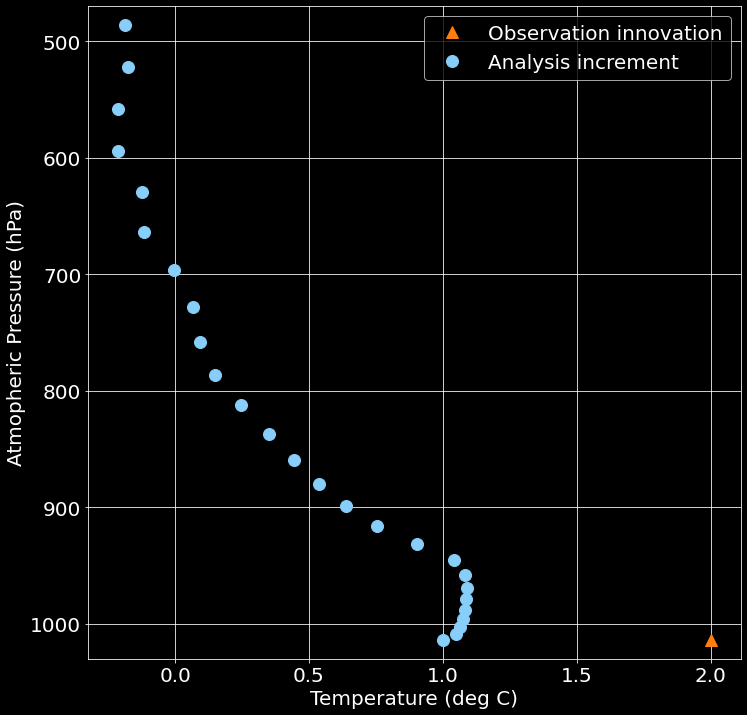

In [83]:
# Style
ax = plt.axes()
plt.style.use('dark_background')

# Data
#ax.plot(atm_temp[38:]-273.15, atm_p[38:], 'wo', markersize=12, label='Background')
ax.plot(2, atm_p[-1], '^', color='tab:orange', markersize=12, label='Observation innovation')
#ax.plot(atm_temp[-1]-273.15+kf_increment[-1], atm_p[-1], 'o', color='lightskyblue', markersize=12, label='Analysis')
ax.plot(kf_increment[38:], atm_p[38:], 'o', color='lightskyblue', markersize=12, label='Analysis increment')

# Labels
ax.set_ylabel('Atmopheric Pressure (hPa)')
ax.set_xlabel('Temperature (deg C)')
ax.grid()
ax.legend()

# Axes 
#ax.set_xlim([-10,30])
ax.set_ylim([470,1030])
ax.invert_yaxis()

# Size
plt.subplots_adjust(hspace=.0)
ax.set_box_aspect(1)
plt.rcParams['figure.figsize'] = [12,12]
plt.rcParams['font.size'] = '20'

# Save
plt.savefig(plot_dir+'/psl_seminar_atm_temp5')
plt.show()

In [84]:
true_cor = this_cor[-1,:] 

In [85]:
# Set ensemble size
ens_size = 20

In [86]:
## Generate ensemble
rnd = np.random.normal(size=(num_levs, ens_size))
x_ens = this_cov_sqrt @ rnd
P_ens = np.cov(x_ens)
C_ens = np.corrcoef(x_ens)

In [87]:
ens_cor = C_ens[-1,:]

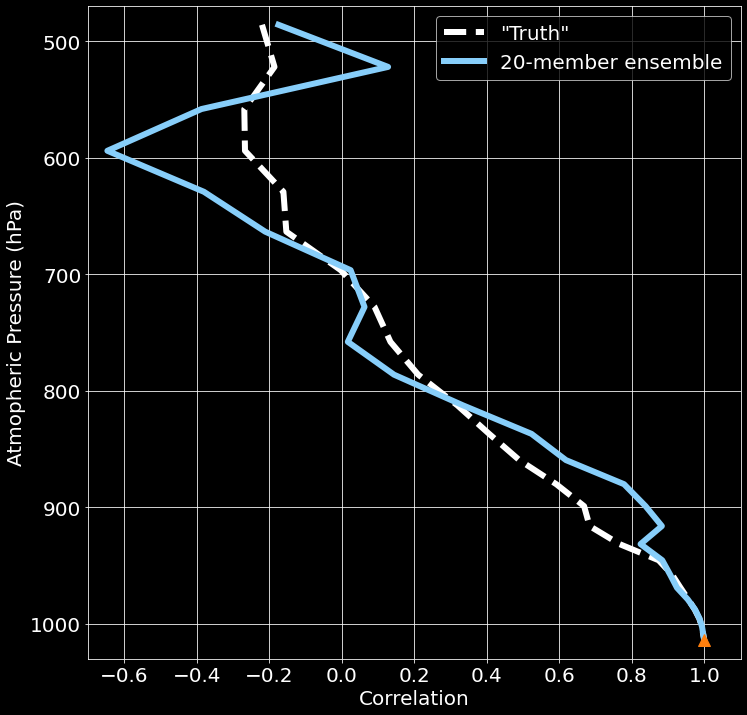

In [141]:
# Style
ax = plt.axes()
plt.style.use('dark_background')

# Data
ax.plot(true_cor[38:], atm_p[38:], 'w--', markersize=12, linewidth=6, label='"Truth"')
ax.plot(ens_cor[38:], atm_p[38:], '-',color='lightskyblue', markersize=12, linewidth=6,label='20-member ensemble')
ax.plot(1, atm_p[-1], '^', color='tab:orange', markersize=12)

# Labels
ax.set_ylabel('Atmopheric Pressure (hPa)')
ax.set_xlabel('Correlation')
ax.grid()
ax.legend()

# Axes 
ax.set_xlim([-.7,1.1])
ax.set_ylim([470,1030])
ax.invert_yaxis()

# Size
plt.subplots_adjust(hspace=.0)
ax.set_box_aspect(1)
plt.rcParams['figure.figsize'] = [12,12]
plt.rcParams['font.size'] = '20'

# Save
plt.savefig(plot_dir+'/psl_seminar_atm_corr')
plt.show()

In [109]:
# Set ensemble size
ens_size = 80

In [116]:
## Generate ensemble
rnd80 = np.random.normal(size=(num_levs, ens_size))
x_ens80 = this_cov_sqrt @ rnd80
P_ens80 = np.cov(x_ens80)
C_ens80 = np.corrcoef(x_ens80)

In [117]:
ens_cor80 = C_ens80[-1,:]

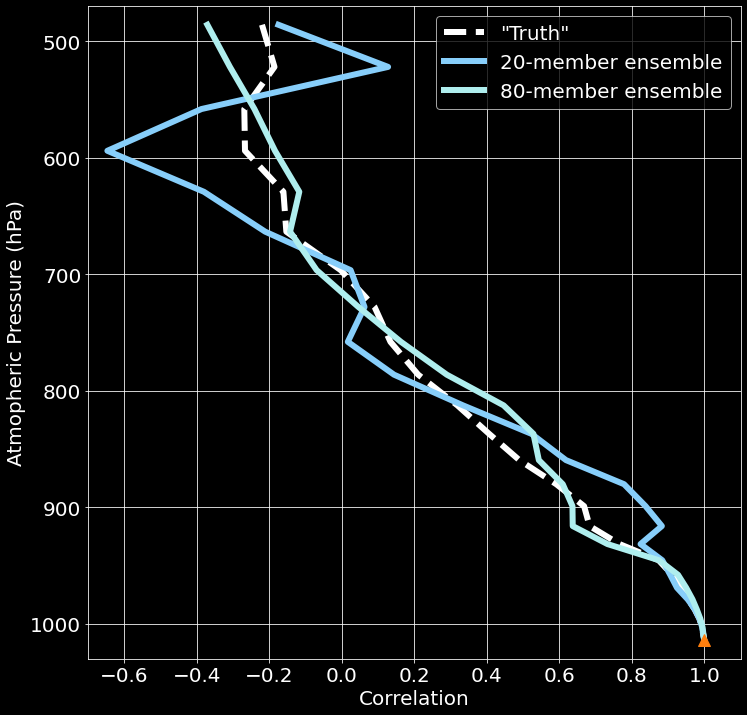

In [140]:
# Style
ax = plt.axes()
plt.style.use('dark_background')

# Data
ax.plot(true_cor[38:], atm_p[38:], 'w--', markersize=12, linewidth=6, label='"Truth"')
ax.plot(ens_cor[38:], atm_p[38:], '-',color='lightskyblue', markersize=12, linewidth=6,label='20-member ensemble')
ax.plot(ens_cor80[38:], atm_p[38:], '-',color='paleturquoise', markersize=12, linewidth=6,label='80-member ensemble')
ax.plot(1, atm_p[-1], '^', color='tab:orange', markersize=12)

# Labels
ax.set_ylabel('Atmopheric Pressure (hPa)')
ax.set_xlabel('Correlation')
ax.grid()
ax.legend()

# Axes 
ax.set_xlim([-.7,1.1])
ax.set_ylim([470,1030])
ax.invert_yaxis()

# Size
plt.subplots_adjust(hspace=.0)
ax.set_box_aspect(1)
plt.rcParams['figure.figsize'] = [12,12]
plt.rcParams['font.size'] = '20'

# Save
plt.savefig(plot_dir+'/psl_seminar_atm_corr2')
plt.show()

In [127]:
# Set ensemble size
ens_size = 1000

In [128]:
## Generate ensemble
rnd500 = np.random.normal(size=(num_levs, ens_size))
x_ens500 = this_cov_sqrt @ rnd500
P_ens500 = np.cov(x_ens500)
C_ens500 = np.corrcoef(x_ens500)

In [129]:
ens_cor500 = C_ens500[-1,:]

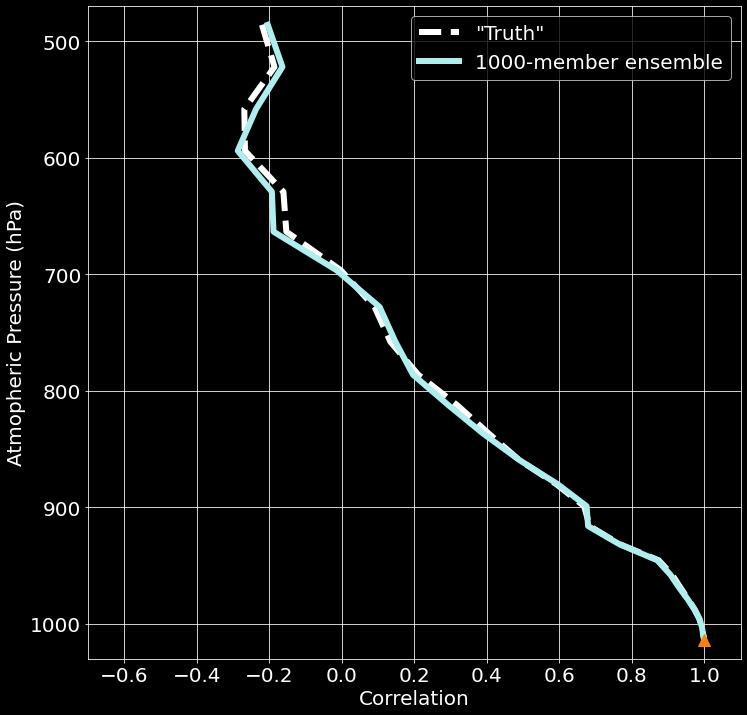

In [139]:
# Style
ax = plt.axes()
plt.style.use('dark_background')

# Data
ax.plot(true_cor[38:], atm_p[38:], 'w--', markersize=12, linewidth=6, label='"Truth"')
#ax.plot(ens_cor[38:], atm_p[38:], '-',color='lightskyblue', markersize=12, linewidth=6,label='20-member ensemble')
ax.plot(ens_cor500[38:], atm_p[38:], '-',color='paleturquoise', markersize=12, linewidth=6,label='1000-member ensemble')
ax.plot(1, atm_p[-1], '^', color='tab:orange', markersize=12)

# Labels
ax.set_ylabel('Atmopheric Pressure (hPa)')
ax.set_xlabel('Correlation')
ax.grid()
ax.legend()

# Axes 
ax.set_xlim([-.7,1.1])
ax.set_ylim([470,1030])
ax.invert_yaxis()

# Size
plt.subplots_adjust(hspace=.0)
ax.set_box_aspect(1)
plt.rcParams['figure.figsize'] = [12,12]
plt.rcParams['font.size'] = '20'

# Save
plt.savefig(plot_dir+'/psl_seminar_atm_corr3')
plt.show()

In [146]:
pos_state = np.log(atm_p)

In [147]:
pos_state = np.abs(pos_state - pos_state[-1])

In [181]:
loc = gaspari_cohn(pos_state/(.7))

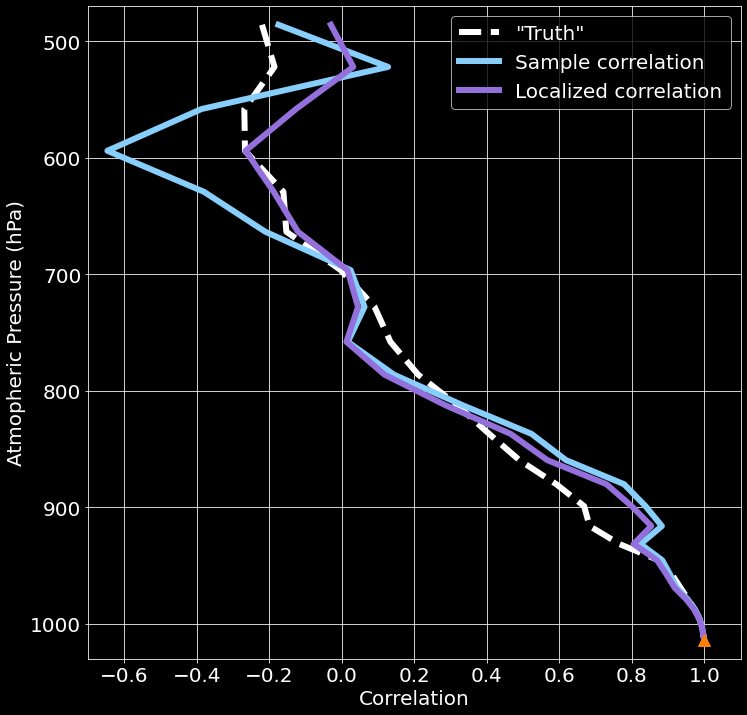

In [185]:
# Style
ax = plt.axes()
plt.style.use('dark_background')

# Data
ax.plot(true_cor[38:], atm_p[38:], 'w--', markersize=12, linewidth=6, label='"Truth"')
ax.plot(ens_cor[38:], atm_p[38:], '-',color='lightskyblue', markersize=12, linewidth=6,label='Sample correlation')
#ax.plot(loc[38:], atm_p[38:], '-',color='lightcoral', markersize=12, linewidth=6,label='Localization function')
ax.plot(loc[38:]*ens_cor[38:], atm_p[38:], '-',color='mediumpurple', markersize=12, linewidth=6,label='Localized correlation')
ax.plot(1, atm_p[-1], '^', color='tab:orange', markersize=12)

# Labels
ax.set_ylabel('Atmopheric Pressure (hPa)')
ax.set_xlabel('Correlation')
ax.grid()
ax.legend(loc='upper right')

# Axes 
ax.set_xlim([-.7,1.1])
ax.set_ylim([470,1030])
ax.invert_yaxis()

# Size
plt.subplots_adjust(hspace=.0)
ax.set_box_aspect(1)
plt.rcParams['figure.figsize'] = [12,12]
plt.rcParams['font.size'] = '20'

# Save
plt.savefig(plot_dir+'/psl_seminar_atm_corr_loc3')
plt.show()

In [186]:
sst_ast_corr = xr.open_dataset(my_data_dir+'/sst_ast_corr.nc')

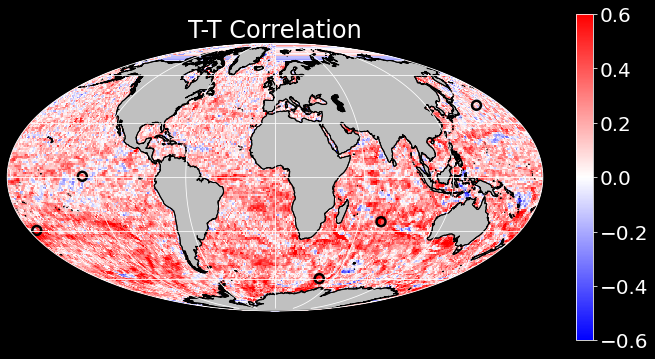

In [210]:
## Save a map of the world showing column locations
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_global()
plt.style.use('dark_background')
im = ax.pcolormesh(sst_ast_corr['lon'], sst_ast_corr['lat'], sst_ast_corr['__xarray_dataarray_variable__'], vmin=-0.6, vmax=0.6, cmap='bwr', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='silver'))
plt.colorbar(im)
plt.title('T-T Correlation')
ax.coastlines(resolution='110m')
ax.gridlines()
ax.scatter(which_columns['lons'], which_columns['lats'],transform=ccrs.PlateCarree(),facecolors='none', edgecolors='k', s=80, linewidth=2.5)

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['font.size'] = '20'
plt.savefig(plot_dir+'/psl_sst_ast_corr_with_column_locations.png')
plt.show()

In [212]:
## Indian Ocean
io_corr = xr.Dataset()
io_corr['sst_atm_T'] = xr.corr(indian_ocean['sst'], indian_ocean['atm_T'], dim = 'ens_mem')
io_corr['sst_ocn_T'] = xr.corr(indian_ocean['sst'], indian_ocean['ocn_Temp'], dim = 'ens_mem')
io_corr['atm_p'] = indian_ocean['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
io_corr = io_corr.mean(['lat', 'lon'])

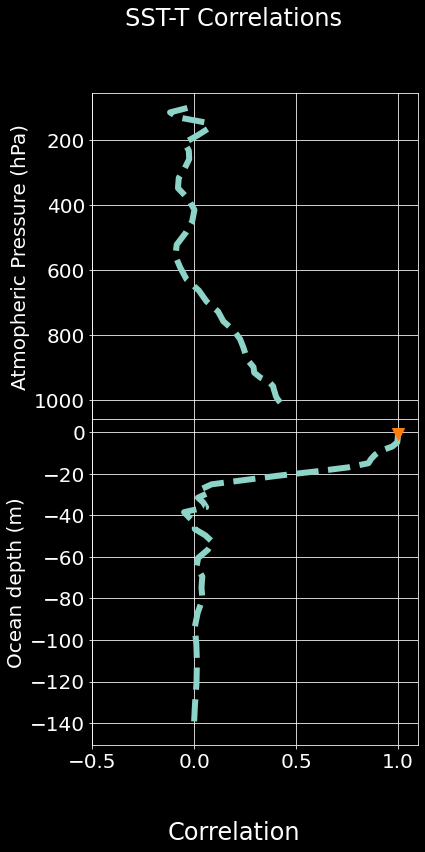

In [241]:
## Create subplots
plt.style.use('dark_background')
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey='row') 

# Plot atm correlations
axs[0].plot(io_corr['sst_atm_T'][23:], io_corr['atm_p'][23:], '--', linewidth=6)

# Plot ocn correlations
axs[1].plot(io_corr['sst_ocn_T'][:37], -1 * io_corr['ocn_lev'][:37], '--', linewidth=6)
axs[1].plot(io_corr['sst_ocn_T'][0], -1 * io_corr['ocn_lev'][0], 'v', markersize=12, color='tab:orange')

# Adjust axes
axs[0].invert_yaxis()

# Adjust and label axes
axs[0].set_xlim([-0.5, 1.1])
axs[0].set_ylabel('Atmopheric Pressure (hPa)')
axs[1].set_ylabel('Ocean depth (m)')
fig.supxlabel('Correlation')
fig.suptitle('SST-T Correlations')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(1)

plt.rcParams['figure.figsize'] = [24,6]
plt.rcParams['font.size'] = '20'
plt.savefig(plot_dir+'/psl_seminar_sst_temp')
plt.show()

In [243]:
## Indian Ocean
io_corr = xr.Dataset()
io_corr['ast_atm_T'] = xr.corr(indian_ocean['atm_T'].sel(atm_lev=63), indian_ocean['atm_T'], dim = 'ens_mem')
io_corr['ast_ocn_T'] = xr.corr(indian_ocean['atm_T'].sel(atm_lev=63), indian_ocean['ocn_Temp'], dim = 'ens_mem')
io_corr['atm_p'] = indian_ocean['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
io_corr = io_corr.mean(['lat', 'lon'])

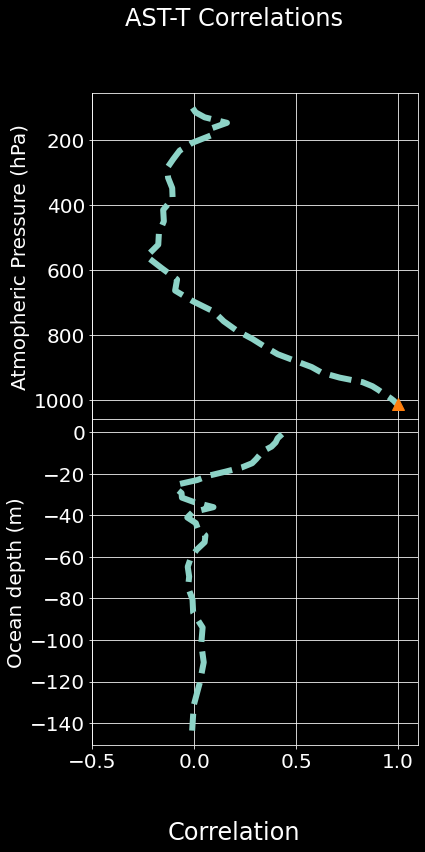

In [258]:
## Create subplots
plt.style.use('dark_background')
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey='row') 

# Plot atm correlations
axs[0].plot(io_corr['ast_atm_T'][23:], io_corr['atm_p'][23:], '--', linewidth=6)
axs[0].plot(io_corr['ast_atm_T'][-1],  io_corr['atm_p'][-1], '^', markersize=12, color='tab:orange')


# Plot ocn correlations
axs[1].plot(io_corr['ast_ocn_T'][:37], -1 * io_corr['ocn_lev'][:37], '--', linewidth=6)

# Adjust axes
axs[0].invert_yaxis()

# Adjust and label axes
axs[0].set_xlim([-0.5, 1.1])
axs[0].set_ylabel('Atmopheric Pressure (hPa)')
axs[1].set_ylabel('Ocean depth (m)')
fig.supxlabel('Correlation')
fig.suptitle('AST-T Correlations')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(1)

plt.rcParams['figure.figsize'] = [24,6]
plt.rcParams['font.size'] = '20'
plt.savefig(plot_dir+'/psl_seminar_ast_temp')
plt.show()

In [ ]:
## Assimilation of AST into ATM
